
# TF-IDF

This notebook explains the TF-IDF method in Natural Language Processing (NLP), 

covering both mathematical foundations and practical implementation in Python.


## 1. History and Background

TF-IDF stands for **Term Frequency–Inverse Document Frequency**. It is a statistical measure used to evaluate how 

important a word is to a document in a collection or corpus. It is one of the most popular weighting schemes in information retrieval and text mining.

- Introduced by **Hans Peter Luhn** (1957) for automatic text summarization.
- Later formalized by **Gerard Salton** in the 1970s in the **SMART Information Retrieval System**.
- Widely used in traditional search engines, text mining, and NLP.

- **1950s-1960s**: The concept originates from information retrieval research
- **1972**: First formal mention by Karen Spärck Jones in her paper "A Statistical Interpretation of Term Specificity and Its Application in Retrieval"
- **1980s-1990s**: Became standard in search engines and document classification
- **Present**: Still widely used as a baseline in text processing and NLP tasks

**Core Idea**:  
Words that occur frequently in a document are important (TF), but if they appear in many documents, they're less informative (IDF).


## 2. Mathematical Foundations

TF-IDF is composed of two components:

- Term Frequency (TF)
Measures how frequently a term occurs in a document:

### $ tf(t,d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d} $

It's like saying what is the probability that a word will be present in the document d?

### Inverse Document Frequency (IDF)
Measures how important a term is across the entire corpus:

### $ idf(t,D) = \log\left(\frac{\text{Total number of documents in corpus } D}{\text{Number of documents containing term } t}\right) $

<strong>this is the basis for defining the TF-IDF concept.</strong>

## Clarify IDF


IDF is used to **penalize common words** that appear in **many documents** and highlight **unique or rare words**. 

Words like **"the"**, **"is"**, and **"and"** appear in almost every document — they aren’t useful for distinguishing 

between texts. IDF **reduces the importance** of such common words. On the other hand, a rare word like **"photosynthesis"** 

might appear only in a few documents. That word is **highly informative** and should be given more weight.

### $\text{IDF}(t, D) = \log \left( \frac{N}{1 + df_t} \right)$

Where:

* $t$ is the term (word)
* $D$ is the corpus (all documents)
* $N$ is the **total number of documents**
* $df_t$ is the number of documents **containing term $t$**

We add 1 to the denominator to avoid division by zero.



## Example

Imagine a corpus of 5 documents:

```
Doc1: "I love machine learning"
Doc2: "Machine learning is fun"
Doc3: "Deep learning and AI too"
Doc4: "AI and robotics very interesting"
Doc5: "Learning is continuous"
```

Let’s compute IDF for a few terms:

### Term: "learning"

* Appears in **4 documents**: Doc1, Doc2, Doc3, Doc5
* So: $\text{IDF}(\text{"learning"}) = \log\left( \frac{5}{1 + 4} \right) = \log(1) = 0$

**Very common**, so **low IDF** (not informative).

### Term: "robotics"

* Appears in **1 document**: Doc4
* So: $ \text{IDF}(\text{"robotics"}) = \log\left( \frac{5}{1 + 1} \right) = \log(2.5) \approx 0.3979 $

**Rare**, so **higher IDF** (more informative).

## Intuition Recap

* **Common word** → Appears in many docs → **Low IDF**
* **Rare word** → Appears in few docs → **High IDF**

TF-IDF combines this with term frequency to give a **balanced score**.

### TF-IDF $(t,d,D) = tf(t,d) \times idf(t,D) $

Note: Variations exist for both TF and IDF calculations (logarithmic, augmented, etc.)

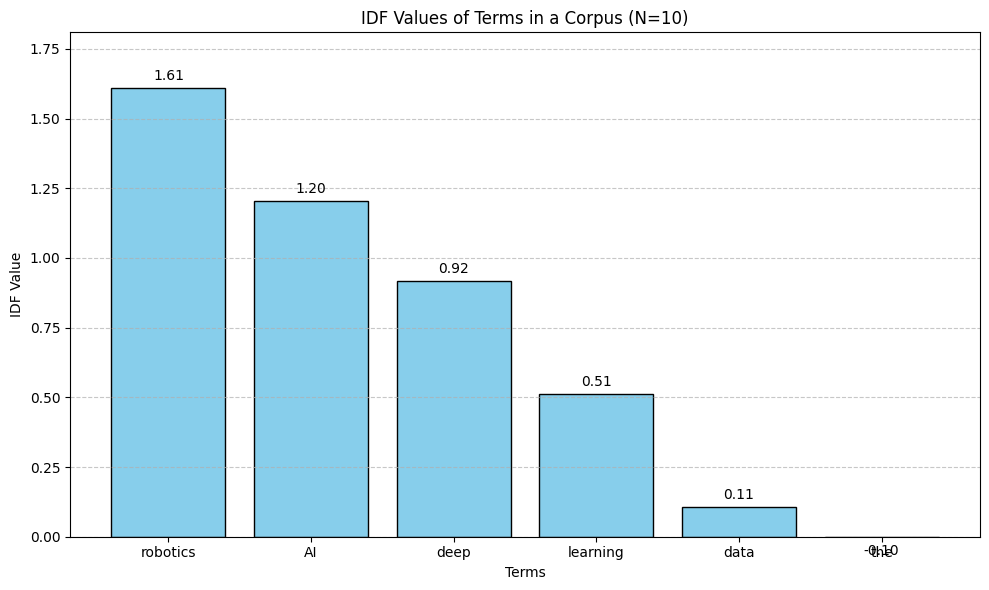

In [5]:
# import necessary libraries after code execution state reset
import matplotlib.pyplot as plt
import numpy as np
import math

# Sample document frequencies (df_t) for terms in a corpus of N documents
N = 10  # Total documents in corpus
df_values = np.array([1, 2, 3, 5, 8, 10])  # Number of documents each word appears in
terms = ['robotics', 'AI', 'deep', 'learning', 'data', 'the']

# Compute IDF for each term
idf_values = [math.log(N / (1 + df)) for df in df_values]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(terms, idf_values, color='skyblue', edgecolor='black')
plt.title('IDF Values of Terms in a Corpus (N=10)')
plt.xlabel('Terms')
plt.ylabel('IDF Value')
plt.ylim(0, max(idf_values) + 0.2)

# Annotate bars with values
for bar, idf in zip(bars, idf_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{idf:.2f}", ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Python Implementation(weak)

In [82]:
import numpy as np
from collections import defaultdict

def compute_tf(text:str):
    """Compute Term Frequency for a single document"""
    tf_dict = {}
    words = text.lower().split()
    word_count = len(words)
    
    for word in words:
        tf_dict[word] = tf_dict.get(word, 0) + 1/word_count
    
    return tf_dict

def compute_idf(docs):
    """Compute Inverse Document Frequency for all documents"""
    idf_dict = defaultdict(lambda: 0)
    total_docs = len(docs)
    
    for doc in docs:
        words = set(doc.lower().split())

        for word in words:
            idf_dict[word] += 1
    
    for word in idf_dict:
        idf_dict[word] = math.log(total_docs / idf_dict[word])
    
    return idf_dict

def compute_tfidf(docs):
    """Compute TF-IDF for all documents"""
    tfidf = []
    idf = compute_idf(docs)
    
    for doc in docs:
        tf = compute_tf(doc)
        doc_tfidf = {}
        
        for word in tf:
            doc_tfidf[word] = tf[word] * idf[word]
        
        tfidf.append(doc_tfidf)
    
    return tfidf

***Compute TF-IDF using our implementation***

In [100]:

import pandas as pd
# Sample documents
corpus = [
    "I love machine learning and natural language processing ",
    "Machine learning is a subset of artificial intelligence",
    "TF-IDF is a statistical measure used in NLP.",
    "I enjoy reading about deep learning and AI."
]

# Compute TF-IDF using our implementation
tfidf_results = compute_tfidf(corpus)
df = pd.DataFrame(tfidf_results)
df.fillna(0, inplace=True)
df = df[sorted(df.columns)]
df


,a,about,ai,and,artificial,deep,enjoy,i,idf,in,...,measure,natural,nlp,of,processing,reading,statistical,subset,tf,used
0,0.000000,0.000000,0.000000,0.333288,0.00000,0.000000,0.000000,0.333288,0.000000,0.000000,...,0.000000,0.37863,0.000000,0.00000,0.37863,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.333288,0.000000,0.000000,0.000000,0.37863,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.37863,0.00000,0.000000,0.000000,0.37863,0.000000,0.000000
2,0.301044,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.341999,0.341999,...,0.341999,0.00000,0.341999,0.00000,0.00000,0.000000,0.341999,0.00000,0.341999,0.341999
3,0.000000,0.372663,0.372663,0.328035,0.00000,0.372663,0.372663,0.328035,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.372663,0.000000,0.00000,0.000000,0.000000


***Notice:*** In this implementation, we have not performed any preprocessing on our text. No stopword removal, 

feature engineering, etc. has been done. That is why our results are different from sklearn's results.

***sklearn TfidfVectorizer***

In [101]:

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample documents
corpus = [
    "I love machine learning and natural language processing.",
    "Machine learning is a subset of artificial intelligence.",
    "TF-IDF is a statistical measure used in NLP.",
    "I enjoy reading about deep learning and AI."
]

# Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")

# Fit and transform the corpus
X = vectorizer.fit_transform(corpus)

# Convert to DataFrame for readability
df = pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names_out())

total_sum = df.values.sum()
print("Total TF-IDF sum:", total_sum)

l2_norm = np.linalg.norm(df.values)
print("L2 norm:", l2_norm)
df


Total TF-IDF sum: 11.377973082531177
L2 norm: 1.9999999999999998


,a,about,ai,and,artificial,deep,enjoy,i,idf,in,...,measure,natural,nlp,of,processing,reading,statistical,subset,tf,used
0,0.000000,0.000000,0.000000,0.314806,0.000000,0.000000,0.000000,0.314806,0.000000,0.000000,...,0.000000,0.399292,0.000000,0.000000,0.399292,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.314806,0.000000,0.000000,0.000000,0.399292,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.399292,0.000000,0.000000,0.000000,0.399292,0.000000,0.000000
2,0.274603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.348299,0.348299,...,0.348299,0.000000,0.348299,0.000000,0.000000,0.000000,0.348299,0.000000,0.348299,0.348299
3,0.000000,0.387766,0.387766,0.305719,0.000000,0.387766,0.387766,0.305719,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.387766,0.000000,0.000000,0.000000,0.000000


**detailed analysis of the differences** between our implementation and sklearn method and **why they produce different TF-IDF results**.


## Summary of Each Code

| Feature                     | Code 1 (Manual)                                 | Code 2 (Scikit-learn)                                       |
| --------------------------- | ----------------------------------------------- | ----------------------------------------------------------- |
| **Library**                 | Custom functions using `math.log` and `split()` | `sklearn.feature_extraction.text.TfidfVectorizer`           |
| **TF calculation**          | Raw frequency divided by total words            | Normalized term frequency (l2-norm by default)              |
| **IDF calculation**         | `log(N / df)`                                   | `log(1 + (N / (1 + df))) + 1` (*by default*)                |
| **Preprocessing**           | Lowercased and split by spaces                  | Uses a regex-based tokenizer with optional stopword removal |
| **Handling of punctuation** | Punctuation is kept if part of the word         | Stripped by default using `token_pattern`                   |
| **Stopwords removal**       | No stopword filtering                           | Optional in `TfidfVectorizer` (not enabled here)            |
| **Normalization**           | No normalization                                | Uses **L2 normalization** by default                        |


## Key Differences Explained

### 1. **IDF Formula Difference**

* **Our Code** (Code 1):

$idf(word) = log(\frac{N}{df})$


  This can cause **high IDF values** for rare terms.

* **Scikit-learn** uses a smoothed version:


$idf = log(1 + \frac{N}{1 + df}) + 1$


  This avoids division by zero and reduces over-penalization of rare words. It’s often called "smooth IDF".

This is the **main reason** why some TF-IDF values are different between the two codes.



### 2. **Normalization**

* **Code 1**: No normalization (raw TF \* IDF product).
* **Code 2**: Applies **L2 normalization** to each document vector:

  $$
  \text{Normalized TF-IDF}_i = \frac{\text{TF-IDF}_i}{\sqrt{\sum_j \text{TF-IDF}_j^2}}
  $$

This changes the scale — values in Code 2 are bounded and **comparable across documents**, while Code 1 values can vary freely.


### 3. **Tokenization Differences**

* **Code 1**: `str.split()` — simple, whitespace-based.
* **Code 2**: Uses a customizable **regex-based tokenizer**, and we have overridden the default with: `token_pattern=r"(?u)\b\w+\b"`

  This keeps single-character words like "I", and drops punctuation.

<div style="color:red">Even slight changes here (like the presence of `"."`) affect term counts and document frequencies.</div>


### 4. **TF Calculation**

* **Code 1**: Relative frequency (`count / total_words`).
* **Code 2**: Uses **raw counts**, then normalized later (unless you specify `use_idf=False`, etc.).



If we want to make our **manual code match sklearn** more closely:

1. Change IDF to the smoothed version: $idf(word) = \log(1 + \frac{\text{number of documents}}{1 + idf(word)}) + 1$

2. Normalize TF-IDF vectors:

3. Use regex-based tokenization (e.g. with `re.findall(r"\b\w+\b", text.lower())`).


In [102]:
import math
import re
from collections import defaultdict
import pandas as pd
import numpy as np

def tokenize(text):
    # Use regex to extract words (matches sklearn default when token_pattern is set)
    return re.findall(r"\b\w+\b", text.lower())

def compute_tf(text):
    """Compute Term Frequency"""
    tf_dict = {}
    words = tokenize(text)
    word_count = len(words)

    for word in words:
        tf_dict[word] = tf_dict.get(word, 0) + 1

    # Convert to term frequency
    for word in tf_dict:
        tf_dict[word] /= word_count

    return tf_dict

def compute_idf(docs):
    """Compute smoothed Inverse Document Frequency"""
    idf_dict = defaultdict(int)
    total_docs = len(docs)

    for doc in docs:
        words = set(tokenize(doc))
        for word in words:
            idf_dict[word] += 1

    for word in idf_dict:
        df = idf_dict[word]
        idf_dict[word] = math.log(1 + total_docs / (1 + df)) + 1  # smoothed IDF

    return idf_dict

def compute_tfidf(docs):
    """Compute TF-IDF with L2 normalization"""
    tfidf_all = []
    idf = compute_idf(docs)

    for doc in docs:
        tf = compute_tf(doc)
        doc_tfidf = {word: tf[word] * idf[word] for word in tf}

        # L2 normalization
        norm = math.sqrt(sum(val**2 for val in doc_tfidf.values()))
        if norm > 0:
            doc_tfidf = {word: val / norm for word, val in doc_tfidf.items()}

        tfidf_all.append(doc_tfidf)

    return tfidf_all

# Sample corpus
corpus = [
    "I love machine learning and natural language processing.",
    "Machine learning is a subset of artificial intelligence.",
    "TF-IDF is a statistical measure used in NLP.",
    "I enjoy reading about deep learning and AI."
]

# Compute TF-IDF
tfidf_results = compute_tfidf(corpus)

# Convert to DataFrame
df = pd.DataFrame(tfidf_results).fillna(0)
df = df[sorted(df.columns)]  # Optional: sort columns alphabetically

total_sum = df.values.sum()
print("Total TF-IDF sum:", total_sum)

l2_norm = np.linalg.norm(df.values)
print("L2 norm:", l2_norm)
df



Total TF-IDF sum: 11.455847972828295
L2 norm: 2.0


,a,about,ai,and,artificial,deep,enjoy,i,idf,in,...,measure,natural,nlp,of,processing,reading,statistical,subset,tf,used
0,0.000000,0.000000,0.000000,0.333288,0.00000,0.000000,0.000000,0.333288,0.000000,0.000000,...,0.000000,0.37863,0.000000,0.00000,0.37863,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.333288,0.000000,0.000000,0.000000,0.37863,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.37863,0.00000,0.000000,0.000000,0.37863,0.000000,0.000000
2,0.301044,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.341999,0.341999,...,0.341999,0.00000,0.341999,0.00000,0.00000,0.000000,0.341999,0.00000,0.341999,0.341999
3,0.000000,0.372663,0.372663,0.328035,0.00000,0.372663,0.372663,0.328035,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.372663,0.000000,0.00000,0.000000,0.000000


## Final review

***sklearn***

Total TF-IDF sum: ***11.377973082531177***<br>
L2 norm: ***1.9999999999999998***

***manual***

Total TF-IDF sum: ***11.455847972828295***<br>
L2 norm: ***2.0***




## 5. References

- Salton, G., & Buckley, C. (1988). *Term-weighting approaches in automatic text retrieval*. Information Processing & Management, 24(5), 513-523.
- Manning, C. D., Raghavan, P., & Schütze, H. (2008). *Introduction to Information Retrieval*. Cambridge University Press.
- Ramos, J. (2003). *Using TF-IDF to Determine Word Relevance in Document Queries*. In Proceedings of the First Instructional Conference on Machine Learning.

**Tools**:  
- scikit-learn: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
